# GOAL -  THE GOAL IS TO INVESTIGATE WHETHER BUSINESSES IN THE TECH SECTOR ARE MORE LIKELY TO RECIEVE FUNDING THAN OTHER SECTORS.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import waterfall_chart

In [2]:
funding_2018 = pd.read_csv('startup_funding2018.csv')
funding_2019 = pd.read_csv('startup_funding2019.csv')
funding_2020 = pd.read_csv('startup_funding2020.csv')
funding_2021 = pd.read_csv('startup_funding2021.csv')

# PROCCESSING FUNDING_2018

# Exploring data

In [3]:
funding_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [4]:
# Checking the data types of all columns

funding_2018.dtypes

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
dtype: object

In [5]:
funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB



A new column named ‘Year of funding was created to indicate the year the funding was received. ( This was done for all other years.)  

In [6]:
#  Adding a new column to indicate the year of funding.
funding_2018['Year of funding'] = 2018
funding_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of funding
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


# Cleaning the Industry column

In [7]:
# Reducing the name in the Industry column to only one value.
funding_2018['Industry'] = funding_2018['Industry'].apply(str)
funding_2018['Industry'] = funding_2018['Industry'].str.split(',').str[0]
funding_2018['Industry'] = funding_2018['Industry'].replace("'", "", regex = True)
funding_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of funding
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018


# Cleaning the Location column

In [8]:
# Reducing the name of the Location to only one value in the column.
funding_2018['Location'] = funding_2018['Location'].apply(str)
funding_2018['Location'] = funding_2018['Location'].str.split(',').str[0]
funding_2018['Location'] = funding_2018['Location'].replace("'", "", regex = True)
funding_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of funding
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,2018


# Cleaning the Amount column

In [9]:
# removing commas( , ) , hyphens( - ) and the dollars currency signs from the 'Amount' column.

funding_2018['Amount'] = funding_2018['Amount'].str.replace(',', '')
funding_2018['Amount'] = funding_2018['Amount'].str.replace('—', '0')
funding_2018['Amount'] = funding_2018['Amount'].str.replace('$', '')
funding_2018

C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\1921011328.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2018['Amount'] = funding_2018['Amount'].str.replace('$', '')


,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of funding
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [10]:
# Creating a new column for Amounts in Rupees
funding_2018['Amount RP'] = funding_2018['Amount'].str.rsplit('₹', n = 2).str[1]
# Setting the data type to float
funding_2018['Amount RP'] = funding_2018['Amount RP'].apply(float).fillna(0)

In [11]:
# Converting Amounts in Rupees to USD 
funding_2018['Amount USD'] = funding_2018['Amount RP'] * 0.0146

# Replacing zero values with Null
funding_2018['Amount USD'] = funding_2018['Amount USD'].replace(0, np.nan)

# Merging the 'Amount USD' column to the 'Amount' column
funding_2018['Amount USD'] = funding_2018['Amount USD'].fillna(funding_2018['Amount'])
funding_2018['Amount USD'] = funding_2018['Amount USD'].replace('$', '', regex = True)
funding_2018['Amount'] = funding_2018['Amount USD']

# Removing the dollar sign 
funding_2018['Amount'] = funding_2018['Amount'].apply(lambda x: float(str(x).replace('$', '')))

# Replacing Zero values in the 'Amount' column wiht Null values
funding_2018['Amount'] = funding_2018['Amount'].replace(0, np.nan)

In [12]:
# Dropping the columns 'Amount RP' and 'Amount USD'
funding_2018.drop(columns = ['Amount RP', 'Amount USD'], inplace = True)
funding_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of funding
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [13]:
funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     526 non-null    object 
 1   Industry         526 non-null    object 
 2   Round/Series     526 non-null    object 
 3   Amount           378 non-null    float64
 4   Location         526 non-null    object 
 5   About Company    526 non-null    object 
 6   Year of funding  526 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ KB


In [14]:
funding_2018.isnull().sum()

Company Name         0
Industry             0
Round/Series         0
Amount             148
Location             0
About Company        0
Year of funding      0
dtype: int64

In [15]:
# Filling the Null values in the 'Amount' column with the Median
funding_2018['Amount'] = funding_2018['Amount'].fillna(funding_2018['Amount'].median())

In [16]:
# Converting the data type of the 'Amount' column to int.
funding_2018["Amount"] = funding_2018.Amount.astype(int)
funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     526 non-null    object
 1   Industry         526 non-null    object
 2   Round/Series     526 non-null    object
 3   Amount           526 non-null    int32 
 4   Location         526 non-null    object
 5   About Company    526 non-null    object
 6   Year of funding  526 non-null    int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 26.8+ KB


# Renaming columns

This was necessary in other to make the column names consistent with the column names of the other years, since they will be merged after cleaning.

In [17]:
# Renaming the columns
funding_2018.rename(columns = {"Company Name":"Company/Brand", "Industry":"Sector", "Location":"HeadQuarter" }, inplace = True ) 
funding_2018.head(2)

,Company/Brand,Sector,Round/Series,Amount,HeadQuarter,About Company,Year of funding
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000,Mumbai,A startup which aggregates milk from dairy far...,2018


In [18]:
# Dropping the 'Round/Series', 'About Company' columns.

funding_2018.drop(['Round/Series', 'About Company', ], axis = 1, inplace = True)
funding_2018.head(2)

,Company/Brand,Sector,Amount,HeadQuarter,Year of funding
0,TheCollegeFever,Brand Marketing,250000,Bangalore,2018
1,Happy Cow Dairy,Agriculture,584000,Mumbai,2018


# PROCCESSING FUNDING_2019

In [19]:
funding_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


# Studing the data

In [20]:
# Viewing info of data
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [21]:
# checking the data types of the data set
funding_2019.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [22]:
# Adding a new column
funding_2019['Year of funding'] = 2019
funding_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year of funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019


# Cleaning the 'Amount' column

In [23]:
# Renaming the Amount column from 'Amount($)' to 'Amount'.
funding_2019.rename(columns={"Amount($)":"Amount" }, inplace = True ) 
funding_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019


In [24]:
# Romoving Dollar signs, commas from the Amounts columns
funding_2019['Amount'] = funding_2019['Amount'].str.replace('$', '')
funding_2019['Amount'] = funding_2019['Amount'].str.replace(',', '')
# Replacing 'Undisclosed' with '0' value
funding_2019['Amount'] = funding_2019['Amount'].str.replace('Undisclosed', '0')
funding_2019.head(4)

C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\3306013307.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2019['Amount'] = funding_2019['Amount'].str.replace('$', '')


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D,2019


In [25]:
# Converting the data type of the 'Amount' column from 'object' to 'float'
funding_2019['Amount'] = pd.to_numeric(funding_2019['Amount'],errors = 'coerce').fillna(0, downcast = 'infer')
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          60 non-null     float64
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount           89 non-null     int64  
 8   Stage            43 non-null     object 
 9   Year of funding  89 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.1+ KB


# Removing rows with undisclosed funding amounts

In [26]:
# checking for number of rows with no amounts
value_count = funding_2019['Amount'].value_counts()
value_count.head(5)

0          12
5000000     6
1500000     4
6000000     4
1000000     4
Name: Amount, dtype: int64

In [27]:
# Replacing Zero values with Null values
funding_2019['Amount'] = funding_2019['Amount'].replace(0, np.nan)

In [28]:
founded_null_values = funding_2019[funding_2019['Amount'].isna()]
founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,NaN,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",NaN,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,NaN,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,NaN,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,NaN,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",NaN,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,NaN,NaN,2019


In [29]:
funding_2019.Amount.describe()

count    7.700000e+01
mean     4.333030e+07
std      1.106216e+08
min      1.000000e+05
25%      2.100000e+06
50%      6.000000e+06
75%      3.000000e+07
max      6.930000e+08
Name: Amount, dtype: float64

In [30]:
# Filling the Null values in the 'Amount' column with the Median
funding_2019['Amount'] = funding_2019['Amount'].fillna(funding_2019['Amount'].median())
funding_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


In [31]:
# Checking value count to view results.
funding_2019['Amount'].value_counts().head(5)


6000000.0     16
5000000.0      6
1500000.0      4
1000000.0      4
30000000.0     3
Name: Amount, dtype: int64

# Cleaning the Founded column

In [32]:
# Viewing Null values in the Founded column
founded_null_values = funding_2019[funding_2019['Founded'].isna()]
founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,6000000.0,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",6000000.0,NaN,2019
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A,2019
11,Appnomic,NaN,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000.0,NaN,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,6000000.0,NaN,2019
27,Fireflies .ai,NaN,NaN,AI,Developer of an artificial intelligence-powere...,Sam Udotong,Canaan Partners,5000000.0,NaN,2019
30,Licious,NaN,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,30000000.0,Series E,2019
31,truMe,NaN,NaN,IoT,A global platform for Identity and Access Mana...,"Babu Dayal, Pramod Uniyal, Lalit Mehta",Rajan Kaistha,140000.0,NaN,2019


In [33]:
# Writing a function to impute values in Null cells in the Founded column
def replace_values (funding_2019,dictionary):
    for key,value in dictionary.items():
        funding_2019.loc[(funding_2019['Company/Brand'] == key) , 'Founded'] = value
    return funding_2019

In [34]:
# Imputing the right values.
Replacing_values = {'Bombay Shaving':2015, 'Eduisfun':2014,'FlytBase':2018,'Finly':2019, 'Quantiphi':2013, 'Appnomic':2019, 'Open Secret':2019, 'Fireflies .ai':2016, 'Licious':2015,
                   'truMe':2021, 'Observe.AI':2017, 'Lil’ Goodness and sCool meal':2018, 'VMate':2011, 'MyGameMate':2019,'Afinoz':2015, 'Rein Games':2018,
                   'Ecozen':2010, 'KredX':2015, 'm.Paani':2015, 'WishADish':2018, 'PiBeam':2013, 'Euler Motors':2018, 'Moms Co':2011, 'Smart Institute':2008,
                   'Sarva':2016, 'Kratikal':2013, 'Froogal':2017, 'Infra.Market':2016, 'Ess Kay Fincorp':1994}

In [35]:
# Replacing the value in the HeadQuarter column
replace_values(funding_2019,Replacing_values)
funding_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,2015.0,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2014.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [36]:
# checking data info to comfirm results of Null values in the Founded column
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          89 non-null     float64
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount           89 non-null     float64
 8   Stage            43 non-null     object 
 9   Year of funding  89 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


In [37]:
# converting the data type of the Founded column from 'float' to 'int'
funding_2019["Founded"] = funding_2019.Founded.astype(int)
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          89 non-null     int32  
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount           89 non-null     float64
 8   Stage            43 non-null     object 
 9   Year of funding  89 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 6.7+ KB


# Cleaning the HeadQuarter column

In [42]:
# Checking for total number of null values in the HeadQuarter column
funding_2019.HeadQuarter.isnull().sum()

19

In [43]:
# Viewing Null values in the HeadQuater column
founded_null_values = funding_2019[funding_2019['HeadQuarter'].isna()]
founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,2015,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
8,Quantiphi,2013,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A,2019
14,Open Secret,2019,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,6000000.0,NaN,2019
16,Byju's,2011,NaN,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN,2019
18,Witblox,2014,NaN,Edtech,Offers a range of robotics learning tools,Amit Modi,Mumbai Angels Network,182700.0,NaN,2019
20,SalaryFits,2015,NaN,Fintech,A platform that promotes financial well-being ...,Renato Araujo,Brazilian VC Fund Confrapar,5000000.0,NaN,2019
21,Pristyn Care,2018,NaN,Healthcare,Delivers advanced medical care & clinical exce...,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...",12000000.0,Series B,2019
22,Springboard,2013,NaN,Edtech,Offers online courses and extensive mentor-bas...,"Gautam Tambay, Parul Gupta",Reach Capital,11000000.0,Post series A,2019
27,Fireflies .ai,2016,NaN,AI,Developer of an artificial intelligence-powere...,Sam Udotong,Canaan Partners,5000000.0,NaN,2019
29,Bijak,2019,NaN,AgriTech,B2B platform for agricultural commodities.,"Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...","Omnivore and Omidyar Network India, Sequoia Ca...",2500000.0,Seed fund,2019


In [44]:
# writing a function to impute values into Null cells in the HeadQuarter column
def replace_values (funding_2019,dictionary):
    for key,value in dictionary.items():
        funding_2019.loc[(funding_2019['Company/Brand'] == key) , 'HeadQuarter'] = value
    return funding_2019

In [45]:
# Imputing the right values
Replacing_values = {'Bombay Shaving':'New Delhi', 'Quantiphi':'Mumbai', 'Open Secret':'Mumbai', "Byju's":'Bengaluru',
                    'Witblox':'Mumbai', 'SalaryFits':'Gurugram', 'Pristyn Care':'Gurgaon', 'Springboard':'Bengaluru',
                    'Fireflies .ai':'Mumbai', 'Bijak':'Delhi', 'truMe':'Haryana', 'Rivigo':'Gurugram', 'VMate':'Gurugram',
                    'Slintel':'Bengaluru', 'Ninjacart':'Bengaluru', 'Cubical Labs':'Gujarat', 'Zebu':'Bangalore',
                    'Phable':'Bangalore', 'Zolostays':'Bangalore'}

In [46]:
# Replacing the values and checking the output to comfirm results
replace_values(funding_2019,Replacing_values)
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          89 non-null     int32  
 2   HeadQuarter      89 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount           89 non-null     float64
 8   Stage            43 non-null     object 
 9   Year of funding  89 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 6.7+ KB


# Cleaning the Sector column

In [48]:
funding_2019.Sector.isnull().sum()

5

In [49]:
# Viewing Null values in the Sector column
founded_null_values = funding_2019[funding_2019['Sector'].isna()]
founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
41,VMate,2011,Gurugram,NaN,A short video platform,NaN,Alibaba,100000000.0,NaN,2019
49,Awign Enterprises,2016,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000.0,Series A,2019
52,TapChief,2016,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000.0,Pre series A,2019
56,KredX,2015,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,26000000.0,Series B,2019
57,m.Paani,2015,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel",5500000.0,Series A,2019


In [50]:
# writing a function to impute values into Null cells in the Sector column
def replace_values (funding_2019,dictionary):
    for key,value in dictionary.items():
        funding_2019.loc[(funding_2019['Company/Brand'] == key) , 'Sector'] = value
    return funding_2019

In [51]:
# Imputing the right values
Replacing_values = {'VMate':'Tech', 'Awign Enterprises':'Tech', 'TapChief':'Tech', 'KredX':'Fintech', 'm.Paani':'Tech'}

In [52]:
funding_2019['Sector'] = funding_2019['Sector'].str.capitalize()
funding_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year of funding
0,Bombay Shaving,2015,New Delhi,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2014,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,Agritech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [53]:
funding_2019['Sector'].value_counts().head(50)

Edtech                          7
Fintech                         5
Agritech                        4
Technology                      4
Saas                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
Iot                             2
Ai                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2b supply chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual banking                 1
Transportation                  1
Transport & rentals             1
Marketing & customer loyalty    1
Infratech                       1
Hospitality   

In [54]:
def Sector_cleaner(x):
    b = str(x).lower()
    if 'food'in b:
        return 'Food and beverages'
    if ('health' or 'yoga') in b:
        return 'Health and wellness'
    if ('fintech' or 'finance tech') in b:
        return 'Fintech'
    if ('ai' or 'tech') in b:
        return 'Tech'
    if ('travel' or 'transport') in b:
        return 'Transportation'
    if 'information' in b:
        return 'Tech'
    
    else:
        return x

In [55]:
funding_2019['Sector'] = funding_2019['Sector'].apply(Sector_cleaner)
funding_2019['Sector'].value_counts()

Edtech                          7
Food and beverages              7
Tech                            5
Fintech                         5
Agritech                        4
Technology                      4
Saas                            4
Logistics                       3
E-commerce                      3
Health and wellness             3
Automobile                      3
Accomodation                    2
Iot                             2
E-marketplace                   2
Transportation                  2
Automotive tech                 2
Sports                          1
Mutual funds                    1
Legal tech                      1
Cybersecurity                   1
Ecommerce                       1
Yoga & wellness                 1
Virtual banking                 1
Marketing & customer loyalty    1
Infratech                       1
Hospitality                     1
Automobile & technology         1
Transport & rentals             1
Social media                    1
Games         

In [56]:
# Removing columns that are not needed for analysis.
funding_2019.drop(['What it does', 'Stage', 'Founders'], axis = 1, inplace = True)
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          89 non-null     int32  
 2   HeadQuarter      89 non-null     object 
 3   Sector           84 non-null     object 
 4   Investor         89 non-null     object 
 5   Amount           89 non-null     float64
 6   Year of funding  89 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 4.6+ KB


# PROCESSING 2020 FUNDING DATA

In [57]:
funding_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


# Exploring data

In [58]:
# Checking the data information.
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [59]:
# Checking total number of rows and columns
funding_2020.shape

(1055, 10)

In [60]:
# Adding 'year of funding' to the columns.
funding_2020['Year of funding'] = 2020
funding_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year of funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN,2020
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN,2020


# Cleaning the data (Funding 2020)

In [61]:
# Removing columns that are not needed for analysis.
funding_2020.drop(['What it does', 'Stage', 'Founders','Unnamed: 9'], axis = 1, inplace = True)
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company/Brand    1055 non-null   object
 1   Founded          843 non-null    object
 2   HeadQuarter      961 non-null    object
 3   Sector           1042 non-null   object
 4   Investor         1017 non-null   object
 5   Amount($)        1052 non-null   object
 6   Year of funding  1055 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 57.8+ KB


# Cleaning the Amount column.

In [62]:
# Changing 'Amount($)' to 'Amount'.
funding_2020.rename(columns={"Amount($)":"Amount" }, inplace = True ) 
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company/Brand    1055 non-null   object
 1   Founded          843 non-null    object
 2   HeadQuarter      961 non-null    object
 3   Sector           1042 non-null   object
 4   Investor         1017 non-null   object
 5   Amount           1052 non-null   object
 6   Year of funding  1055 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 57.8+ KB


In [63]:
# Romoving the object items from the Amounts columns
funding_2020['Amount'] = funding_2020['Amount'].str.replace('$', '')
funding_2020['Amount'] = funding_2020['Amount'].str.replace(',', '')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('Undisclosed', '0')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('Undiclsosed', '0')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('800000000 to 850000000', '825000000')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('887000 23000000', '11943500')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('.', '')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('NaN', '0')
funding_2020['Amount'] = funding_2020['Amount'].str.replace('Undislosed', '0')
funding_2020

C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\1453242349.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2020['Amount'] = funding_2020['Amount'].str.replace('$', '')
C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\1453242349.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2020['Amount'] = funding_2020['Amount'].str.replace('.', '')


,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,200000,2020
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,100000,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,0,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000,2020
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge",340000,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,"DSG Consumer Partners, Blume Ventures",1500000,2020
1051,EpiFi,NaN,NaN,Fintech,"Sequoia India, Ribbit Capital",13200000,2020
1052,Purplle,2012,Mumbai,Cosmetics,Verlinvest,8000000,2020
1053,Shuttl,2015,Delhi,Transport,SIG Global India Fund LLP.,8043000,2020


In [64]:
# Checking unique entries in the Amount column
funding_2020.Amount.unique()

array(['200000', '100000', '0', '400000', '340000', '600000', '45000000',
       '1000000', '2000000', '1200000', '660000000', '120000', '7500000',
       '5000000', '500000', '3000000', '10000000', '145000000',
       '100000000', nan, '21000000', '4000000', '20000000', '560000',
       '275000', '4500000', '15000000', '390000000', '7000000', '5100000',
       '700000000', '2300000', '700000', '19000000', '9000000',
       '40000000', '750000', '1500000', '7800000', '50000000', '80000000',
       '30000000', '1700000', '2500000', '40000', '33000000', '35000000',
       '300000', '25000000', '3500000', '200000000', '6000000', '1300000',
       '4100000', '575000', '800000', '28000000', '18000000', '3200000',
       '900000', '250000', '4700000', '75000000', '8000000', '121000000',
       '55000000', '3300000', '11000000', '16000000', '5400000',
       '150000000', '4200000', '22000000', '52000000', '1100000',
       '118000000', '1600000', '18500000', '70000000000', '800000000',
      

In [65]:
# converting data type of Amount column into float.
funding_2020['Amount'] = pd.to_numeric(funding_2020['Amount'],errors = 'coerce').fillna(0, downcast = 'infer')
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company/Brand    1055 non-null   object
 1   Founded          843 non-null    object
 2   HeadQuarter      961 non-null    object
 3   Sector           1042 non-null   object
 4   Investor         1017 non-null   object
 5   Amount           1055 non-null   int64 
 6   Year of funding  1055 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 57.8+ KB


In [66]:
# Checking for value count of the Amount column
value_count = funding_2020['Amount'].value_counts()
value_count.head(5)

0          248
1000000     53
2000000     39
3000000     27
5000000     24
Name: Amount, dtype: int64

In [67]:
funding_2020['Amount'] = funding_2020['Amount'].replace(0, np.nan)

In [69]:
# Checking for Null values in the Amount column
founded_null_values = funding_2020[funding_2020['Amount'].isna()]
founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,NaN,2020
7,Metvy,2018,Gurgaon,Networking platform,HostelFund,NaN,2020
11,Medfin,2017,Bangalore,HealthTech,"Axilor Ventures, S.D. Shibulal",NaN,2020
12,MasterG,2015,New Delhi,Fashion startup,Acumen Fund's angel programme,NaN,2020
18,Pine Labs,1998,Noida,FinTech,"Mastercard, Temasek Holdings",NaN,2020
...,...,...,...,...,...,...,...
1023,Skilancer,NaN,Noida,Technology,Venture Catalysts,NaN,2020
1024,Harappa Education,NaN,New Delhi,Edtech,James Murdoch-led Lupa Systems,NaN,2020
1028,PayMart,2015,Chandigarh,Fintech,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh...",NaN,2020
1040,BuildPan,2019,Indore,SaaS,"HNIs in India, Japan, and the US",NaN,2020


In [70]:
funding_2020['Amount'] = funding_2020['Amount'].fillna(funding_2020['Amount'].median())
funding_2020

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,200000.0,2020
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,100000.0,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,3000000.0,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,2020
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,"DSG Consumer Partners, Blume Ventures",1500000.0,2020
1051,EpiFi,NaN,NaN,Fintech,"Sequoia India, Ribbit Capital",13200000.0,2020
1052,Purplle,2012,Mumbai,Cosmetics,Verlinvest,8000000.0,2020
1053,Shuttl,2015,Delhi,Transport,SIG Global India Fund LLP.,8043000.0,2020


# Cleaning the Sector column

In [72]:
funding_2020.Sector.isnull().sum()

13

In [73]:
funding_2020['Sector'] = funding_2020['Sector'].str.capitalize()
funding_2020
# funding_2020['Sector'] = funding_2020['Sector'].str.strip

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Aqgromalin,2019,Chennai,Agritech,Angel investors,200000.0,2020
1,Krayonnz,2019,Bangalore,Edtech,GSF Accelerator,100000.0,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,3000000.0,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,2020
4,Gramophone,2016,Indore,Agritech,"Siana Capital Management, Info Edge",340000.0,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,"DSG Consumer Partners, Blume Ventures",1500000.0,2020
1051,EpiFi,NaN,NaN,Fintech,"Sequoia India, Ribbit Capital",13200000.0,2020
1052,Purplle,2012,Mumbai,Cosmetics,Verlinvest,8000000.0,2020
1053,Shuttl,2015,Delhi,Transport,SIG Global India Fund LLP.,8043000.0,2020


In [74]:
value_count = funding_2020['Sector'].value_counts()
value_count.head(10)

Fintech       131
Edtech        107
Healthtech     42
Agritech       38
E-commerce     33
Saas           24
Ecommerce      22
Media          19
Tech           19
Ai             18
Name: Sector, dtype: int64

In [75]:
funding_2020.Sector.unique()

array(['Agritech', 'Edtech', 'Hygiene management', 'Escrow',
       'Networking platform', 'Fintech', 'Crowdsourcing',
       'Food & bevarages', 'Healthtech', 'Fashion startup',
       'Food industry', 'Food delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'Ai startup',
       'Telecommunication', 'Logistics', 'Tech startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'Iot startup', 'Saas startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working startup', 'Finance company',
       'Tech company', 'Solar monitoring company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational ai platform', 'Real estate',
       'Saas platform', 'Ai platform', 'Fusion beverages', 'Hr tech',
       'Job portal', 'Hospitality', 'Digit

In [76]:
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Edtech startup', 'Edtech')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Ai startup', 'Ai')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Tech company', 'Tech')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Tech startup', 'Tech')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('It', 'Tech')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Iot', 'Tech')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Technology', 'Tech')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Gaming startup', 'Gaming')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Bevarages', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevaragestech', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevarages', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevarages industry', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevarages & bevarages', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevaragestech', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages & bevarages', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages tech', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Beverage', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Beverages', 'Food & bevarages')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Food & bevarages industry', 'Food & bevarages')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Fitness startup', 'Fitness')


funding_2020['Sector'] = funding_2020['Sector'].str.replace('Saas startup', 'Saas')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Saas platform', 'Saas')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Automotive', 'Automobiles')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Automobile', 'Automobiles')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Automobiless', 'Automobiles')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Automobiless and rentals', 'Automobiles')

funding_2020['Sector'] = funding_2020['Sector'].str.replace('Health', 'Health & wellness')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Healthcare', 'Health & wellness')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Health & wellnesstech', 'Health & wellness')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Health & wellness & wellness', 'Health & wellness')
funding_2020['Sector'] = funding_2020['Sector'].str.replace('Health & wellnesscare', 'Health & wellness')


value_count = funding_2020['Sector'].value_counts()
value_count.head(50)

Fintech                    131
Edtech                     111
Health & wellness           62
Tech                        57
Saas                        43
Agritech                    38
E-commerce                  33
Ai                          31
Food & bevarages            30
Ecommerce                   22
Gaming                      21
Media                       19
Logistics                   16
Food & bevaragestech        15
Automobiles                 13
Entertainment               12
Fitness                      8
Cosmetics                    7
Fashion                      7
Finance                      6
Retail                       6
Hr tech                      6
Real estate                  6
Marketplace                  5
Medtech                      5
Hospitality                  5
Transport                    5
Logitech                     5
Insurtech                    4
Spacetech                    4
Digital media                4
Cleantech                    4
Social m

In [77]:
# Viewing basic statistics of the Sector column
funding_2020.Sector.describe()

count        1042
unique        265
top       Fintech
freq          131
Name: Sector, dtype: object

In [78]:
# Imputing the missing valus with teh
funding_2020['Sector'].fillna('FinTech', inplace = True)
funding_2020

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Aqgromalin,2019,Chennai,Agritech,Angel investors,200000.0,2020
1,Krayonnz,2019,Bangalore,Edtech,GSF Accelerator,100000.0,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,3000000.0,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,2020
4,Gramophone,2016,Indore,Agritech,"Siana Capital Management, Info Edge",340000.0,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,"DSG Consumer Partners, Blume Ventures",1500000.0,2020
1051,EpiFi,NaN,NaN,Fintech,"Sequoia India, Ribbit Capital",13200000.0,2020
1052,Purplle,2012,Mumbai,Cosmetics,Verlinvest,8000000.0,2020
1053,Shuttl,2015,Delhi,Transport,SIG Global India Fund LLP.,8043000.0,2020


# Cleaning the Founded column

In [79]:
# Replacing hyphen (-) as Null values
funding_2020['Founded'] = funding_2020['Founded'].replace('-', np.nan)

In [80]:
funding_2020.Founded.isnull().sum()

213

In [81]:
# Viewing Null values in the Founded column
funding_2020[funding_2020['Founded'].isna()].head(50)


,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
162,Jade Forest,NaN,Delhi,Food & bevaragess,NaN,250000.0,2020
164,FrontRow,NaN,Bangalore,Edtech,"Lightspeed, Elevation, Deepika Padukone",3200000.0,2020
180,Traya,NaN,Mumbai,Health & wellness,"Kae Capital, Whiteboard Capital",3000000.0,2020
244,Hire Me Car,NaN,Noida,Car service,NaN,3000000.0,2020
277,Uni,NaN,Mumbai,Fintech,"Lightspeed India Partners, Accel India",18500000.0,2020
293,Fanball XI,NaN,New Delhi,Gaming,Foxhog Ventures,1000000.0,2020
387,Assiduus,NaN,Bangalore,E-commerce,VC Firm K Partners,1000000.0,2020
401,ClanConnect,NaN,Delhi,Marketing startup,NaN,600000.0,2020
482,PurohitJi,NaN,Bangalore,Linguistic spiritual,Bhadresh,3000000.0,2020
496,The Money Club,NaN,Delhi,Ai,Venture Catalysts,3000000.0,2020


In [82]:
# writing a function to impute values into Null cells in the Founded column
def replace_values (funding_2020,dictionary):
    for key,value in dictionary.items():
        funding_2020.loc[(funding_2020['Company/Brand'] == key) , 'Founded'] = value
    return funding_2020

In [83]:
# Imputing the right values
Replacing_values = {'Invento Robotics':2016, 'Fitphilia':2016, 'Medicus':2004, 'Monech':2019, 'Teach Us':2006, 'Dealberg':2016, 
                    'Extra Edge':2015, 'Karfa':2012, 'Toddle':2019, 'IncubateHub':2014, 'Rage Coffee':2018, 'Skilancer':2017, 
                    'Harappa Education':2018, 'Rheo':2015, 'Axio Biosolutions':2018, 'Techbooze':2017, 'Testbook':2013, 
                    'HaikuJAM':2013, 'Mamaearth':2016, 'Generico':2017, 'Chai Kings':2016, 'Super Surfaces':2014, 'Quicko':2019, 
                    'Satin Creditcare':1998, 'Leverage Edu':2017, 'EpiFi':2019, 'PurohitJi':2018,
                    'Zomato':2010, 'RaRa Delivery':2017, 'JusPay':2012, 'Camp K12':2010, 'Ergos':2012, 'SaScan':2015,  
                    'Oda Class':2019, 'Umeed Housing':2016, 'Flick Stree':2016, 'MinionLabs':2017, 'Invideo':2017,
                    'ElecTorq':2019,'Prayaan Capital':2018, 'Sanfe':2018, 'Digit Insurance':2016, 'Onsitego':2010, 
                    'Simsim':2018, 'HooLiv':2019, 'NEETprep':2016, 'Dot Pvt. Ltd':1990, 'Spaciya Consultants':2016,
                    'ClassMonitor':2016, 'Friyey':2019, 'Oga':2015, 'CYFIRMA':2017, 'Innoviti':2003, 'Nova Credit':2015, 
                    'MoEngage':2014, 'Near Store':2018,  'Instoried':2017, 'Nupay':2017, 'LogiNext':2014,
                    'Altor':2003, 'WorkIndia':2015, 'Qyuki':2010, 'Leap India':2013, 'Picxy':2017, 'Krimanshi':2015, 
                    'Kuku FM':2018, 'Tribe Theory':2018, 'Fleetx':2017, 'Embibe':2012, 'Oye! Rickshaw':2017, 'Sprinng Foods':1993, 
                    'Aagey':2016, 'INdwealth':2018, 'Digit Insurance':2016, 'GetVantage':2019, 'Pine Labs':1998,
                    'Park+':2019, 'uFony Services Pvt ltd':2012, 'Piggy Ride':2019, 'Knorish':2016, 'Ola Financial Services':2007, 
                    'HomeCapital':1977, 'NWNT (No Worry No Tension Healthcare)':2015, 'Voicezen':2018, 'Biryani By Kilo':2015,
                    'Consure Medical':2011, 'Vedantu':2019, 'Yellow Messenger':2014, 'Ewar':2020, 'SugarBox':2014, 'Big Basket':2011, 
                    'Amica':1907, 'Vedantu':2014,'Plop':2001, 'Lido Learning':2019, 'Design X':2016, 'Driftly Electric':2019,
                    'SnackAmor':2017, 'CoinDCX':2018, 'NuNu TV':2020, 'QTalk':2018, 'Excess2Sell':2016, 'Pitstop':1670,
                    'Agnikul':2017, 'OM Bhakti':2012, 'Ola Electric':2017, 'Multi Living':2018, 'FamPay':2019, 'Craftsvilla':2011,
                    'UnboxRobotics Labs':2019, 'Karbon Card':2019, 'Airmeet':2019, 'Innerchef':2015, 'StyleNook':2015,
                    'Callido Learning':2019, 'Soxytoes':2018, 'Salesken':2018, 'Arya':1875, 'Leap Finance':2019,'GogoBus':2019,
                    'Jade Forest':2018, 'FrontRow':2012, 'Traya':2019, 'Hire Me Car': 2015, 'Uni': 2012, 'Fanball XI':2020,
                    'Assiduus':2007, 'ClanConnect':2019, 'The Money Club':2016, 'OneCode':2019, 'Teachmint':2020, 
                    'FPL Technologies':2019, 'Mitron':2020, 'DaveAI':2016, 'Bolo Indya':2019, 'Wobot Intelligence':2017, 
                    'DrinkPrime':2016, 'Probus Smart Things':2017, 'CrowdPouch':2014, 'Chingari': 2018, 'DatStop':2019, 
                    'IPHM Services':2019, 'Wellcure':2002, 'Firescore':2018, 'WYN Studio':2019, 'MPowered':2020, 
                    'Gigforce': 2020, 'Openapp': 2015, 'PumPumPum': 2018, 'uFony Services Pvt Ltd':2012, 'Uable': 2020, 
                    'Piggy Rid':2019, 'NOTO':2018, 'Forbidden Foods': 2018, 'Gobbly':2019, 'Aerostrovilos':2017, 'Mitron':2017,
                    'Arth Designbuild':2012, 'goDutch':2019, 'Bombay Play':2017, 'Yulu':2017, 'Drishti Technologies': 2016, 'Sarva':2001, 
                    'GabbarDeals': 2000, 'Biomoneta':2014, 'Edvizo': 2018, 'Servify' :2015, 'Drum Food':2007, 
                    'Ameliorate Biotech':2015, 'iNurture Education': 2007, 'Timios':2016, 'Knor la Financial Services': 2007, 
                    'Toch':2016, 'Gram Cover': 2016, 'Home Capital':2017, 'Euler Motors': 2018, 'Agro2o': 2018,
                    'NWNT (No Worry No oicezen': 2018, 'Leap Club':2020, 'Xtracap':2017, 'Khatabook':2019, 'Illumnus': 2018, 
                    'Indian School Finance Company':1994, 'Tesco Charge Zone': 2018, 'Spyne': 2018, 'Generic Aadhaar': 2018, 
                    'Nium': 2014, 'Mintoak':2017, 'Clover': 2017, 'Varthana':2013, 'onsure Medical':2011, 'Tessol':2013, 
                    'Remedo' :2017, 'Qin1':2015, 'Expertrons' :2019, 'NewsBytes':2015, 'Fittr': 2016, 'edantu' :2011, 
                    'Bijak':2019, 'Yap':2014, 'DailyHunt':2011, 'ITILITE': 2017, 'Morning Context':2019, 'Savvy Co op':2016,
                    'Yel Ewar': 2019, 'Setu': 2018, 'Wellthy Therapeutics': 2015, 'FarEye' : 2013, 'Rebel Foods':2011}

In [84]:
# Replacing the values and checking the output to comfirm results
replace_values(funding_2020,Replacing_values)
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1055 non-null   object 
 1   Founded          1055 non-null   object 
 2   HeadQuarter      961 non-null    object 
 3   Sector           1055 non-null   object 
 4   Investor         1017 non-null   object 
 5   Amount           1055 non-null   float64
 6   Year of funding  1055 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 57.8+ KB


In [85]:
# converting the data type of the Founded column from 'float' to 'int'
funding_2020["Founded"] = funding_2020.Founded.astype(int)
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1055 non-null   object 
 1   Founded          1055 non-null   int32  
 2   HeadQuarter      961 non-null    object 
 3   Sector           1055 non-null   object 
 4   Investor         1017 non-null   object 
 5   Amount           1055 non-null   float64
 6   Year of funding  1055 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 53.7+ KB


# Cleaning the HeadQuarter column

In [86]:
funding_2020.HeadQuarter.isnull().sum()

94

In [87]:
# Viewing Null values in the Founded column
funding_2020[funding_2020['HeadQuarter'].isna()].head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
87,Habitat,2016,NaN,Edtech,"Unitus Ventures, Whiteboard Capital",600000.0,2020
92,Raskik,2019,NaN,Fusion beverages,"Venture Catalysts, 9Unicorns",1000000.0,2020
95,Pravasirojgar,2020,NaN,Job portal,GoodWorker.,33000000.0,2020
121,Kaagaz Scanner,2020,NaN,Scanning app,Pravega Ventures,575000.0,2020
487,Exprs,2018,NaN,Nano distribution network,"Sweta Rau, Sandeep Kapoor",5660000.0,2020
499,Verloop.io,2015,NaN,Ai,Alpha Wave incubation,5000000.0,2020
500,Otipy,2020,NaN,Agritech/commerce,Inflection Point Ventures,1000000.0,2020
515,Daalchini,2017,NaN,Tech,Artha Venture Fund,669000.0,2020
516,Suno India,2018,NaN,Media,Shobu Yarlagadda,3000000.0,2020
519,Eden Smart Homes,2018,NaN,Tech,Inflection Point Ventures,3000000.0,2020


In [88]:
# writing a function to impute values into Null cells in the Founded column
def replace_values (funding_2020,dictionary):
    for key,value in dictionary.items():
        funding_2020.loc[(funding_2020['Company/Brand'] == key) , 'HeadQuarter'] = value
    return funding_2020

In [89]:
# Imputing the right values
Replacing_values = {'Techbooze':'Delhi', 'Testbook':'Mumbai', 'HaikuJAM':'Mumbai', 'Mamaearth':'Gurgaon', 
                    'Rentomojo':'Bengaluru', 'Zomato':'Gurgaon', 'Shiksha':'New Delhi',
                    'XpressBees':'Pune', 'Wealth Bucket':'New Delhi', 'EpiFi':'Bengaluru',
                    'Verloop.io':'Bangalore', 'Bijnis':'Delhi', 'F5':'Bangalore' , 'Illumnus':'Pune', 'Nium':'Mumbai', 
                    'Morning Context':'Mumbai', 'Amica':'Kolkata', 'Fingerlix':'Mumbai',
                    'Zupee':'Gurgaon', 'DeHaat':'Patna City', 'Akna Medical':'Gurgaon', 'RaRa Delivery':'CoHive Menara', 
                    'Obviously AI':'Mumbai', 'CoinDCX':'Mumbai', 'NuNu TV':'Delhi', 'Fintso':'Mumbai', 
                    'Smart Coin':'Bengaluru', 'Shop101':'Mumbai', 'Neeman':'Hyderabad', 'Invideo':'Dehi', 
                    'SmartVizX':'Noida', 'Carbon Clean':'Bangalore', 'Indusface':'Mumbai',
                    'Onsitego':'Mumbai', 'Nova Credit':'Delhi', 'HempStreet':'New Delhi', 'Classplus':'Noida', 
                    'Chaayos':'New Delhi','Altor':'Mumbai', 'Byju':'Bengaluru', 'WorkIndia':'Bengaluru', 
                    'Fleetx':'Gurugram', 'Oye! Rickshaw':'Delhi', 'RACEnergy':'Hyderabad', 'MoneyTap':'Bangalore', 
                    'LogiNext':'Mumbai', 'Park+':'Gurugram', 'SmartKarrot':'Delhi', 'Jiffy ai':'Bengaluru',
                    'Skylo':'Mumbai', 'Samya AI':'Bangalore', 'Kristal AI':'Mumbai', 'Invento Robotics':'Bangalore', 
                    'Teach Us':'Mumbai', 'Phenom People':'Hyderabad', 'Gamerji':'Unknown', 'AvalonMeta':'Bangalore',
                    'Aesthetic Nutrition':'New Delhi', 'TechnifyBiz':'New Delhi', 'Klub':'Bengaluru', 'Rheo':'Bengaluru',
                    'Habitat':'Mumbai', 'Raskik':'Gurugram', 'Pravasirojgar':'Mumbai', 'Kaagaz Scanner':'Gurugram',
                    'Exprs':'Hyderabad', 'Otipy':'Delhi', 'Daalchini':'Delhi', 'Suno India':'Secunderabad',
                    'Eden Smart Homes':'Delhi', 'Oziva':'Mumbai', 'Yulu':'Bengaluru', 'Peppermint': 'Pune', 
                    'Postman':'Bangalore', 'Myelin Foundry':'Bengaluru', 'iNurture Education':'Bangalore',
                    'Credgencies': 'Gurugram', 'Vahak':'Bangalore Pune', 'Juicy Chemistry' :'Coimbatore', 'Shiprocket':'Delhi',
                    'Generic Aadhaar':'Thane', 'Phable':'Bangalore', 'DailyHunt':'Bengaluru', 'Pedagogy':'Ahmedabad', 
                    'Sarva':'Mumbai', 'NIRA':'Bengaluru','Mumbai Context':'Mumbai', 'Savvy Co op': 'Mumbai', 'BLive':'Noida',
                    'Toch':'Mumbai', 'Setu':'Bengaluru', 'Rebel Foods': 'Mumbai'}

In [90]:
# Replacing the values and checking the output to comfirm results
replace_values(funding_2020,Replacing_values)
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1055 non-null   object 
 1   Founded          1055 non-null   int32  
 2   HeadQuarter      1055 non-null   object 
 3   Sector           1055 non-null   object 
 4   Investor         1017 non-null   object 
 5   Amount           1055 non-null   float64
 6   Year of funding  1055 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 53.7+ KB


# Cleaning the Investor column.

In [91]:
funding_2020.Investor.isnull().sum()

38

In [92]:
funding_2020.Investor.describe()

count                  1017
unique                  848
top       Venture Catalysts
freq                     20
Name: Investor, dtype: object

In [93]:
# Imputing the missing valus with teh
funding_2020['Investor'].fillna('Unspecified', inplace = True)
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1055 non-null   object 
 1   Founded          1055 non-null   int32  
 2   HeadQuarter      1055 non-null   object 
 3   Sector           1055 non-null   object 
 4   Investor         1055 non-null   object 
 5   Amount           1055 non-null   float64
 6   Year of funding  1055 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 53.7+ KB


# PROCESSING FUNDING 2021

# Exploring the data

In [94]:
funding_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [95]:
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [96]:
funding_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [97]:
# Adding year of funding column
funding_2021['Year of funding'] = 2021
funding_2021.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year of funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021


In [98]:
# Removing columns that are not needed ( what it does, investor, founders, stage)
funding_2021.drop(['What it does', 'Stage', 'Founders'], axis = 1, inplace = True)
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1209 non-null   object 
 1   Founded          1208 non-null   float64
 2   HeadQuarter      1208 non-null   object 
 3   Sector           1209 non-null   object 
 4   Investor         1147 non-null   object 
 5   Amount($)        1206 non-null   object 
 6   Year of funding  1209 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 66.2+ KB


# Data Cleaning

# Cleaning the Investor column.

In [99]:
# Reducing the name of the Location to only one value in the column.
funding_2021['Investor'] = funding_2021['Investor'].apply(str)
funding_2021['Investor'] = funding_2021['Investor'].str.split(',').str[1]
funding_2021['Investor'] = funding_2021['Investor'].replace("'", "", regex = True)
funding_2021

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount($),Year of funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Entrepreneur First,"$1,200,000",2021
1,upGrad,2015.0,Mumbai,EdTech,IIFL Asset Management,"$120,000,000",2021
2,Lead School,2012.0,Mumbai,EdTech,Westbridge Capital,"$30,000,000",2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,IDG Capital,"$51,000,000",2021
4,FypMoney,2021.0,Gurugram,FinTech,Mukesh Yadav,"$2,000,000",2021
...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,NaN,$3000000,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,NaN,$20000000,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,NaN,$55000000,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,ETS,$26000000,2021


In [100]:
funding_2021.Investor.isnull().sum()

591

In [101]:
# value_count = funding_2020['Sector'].value_counts()
# value_count.head(50)
funding_2021.Investor.value_counts()

 Elevation Capital             9
 Nexus Venture Partners        6
 Better Capital                6
 9Unicorns Accelerator Fund    6
 Kunal Shah                    6
                              ..
 DLabs                         1
 Colgate Palmolive             1
 Investpad                     1
 Artha India Ventures          1
 ETS                           1
Name: Investor, Length: 460, dtype: int64

In [102]:
funding_2021.Investor.describe()

count                    618
unique                   460
top        Elevation Capital
freq                       9
Name: Investor, dtype: object

In [103]:
# filling out the Null values in the Investor column with the mode.
funding_2021['Investor'].replace(np.NAN, value = 'Undisclosed', inplace = True)

# Cleaning the Amount column

In [104]:
# Renaming the amount column from 'Amount($)' to 'Amount'
funding_2021.rename(columns={"Amount($)":"Amount" }, inplace = True ) 
funding_2021.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Entrepreneur First,"$1,200,000",2021
1,upGrad,2015.0,Mumbai,EdTech,IIFL Asset Management,"$120,000,000",2021


In [105]:
# Checking for unique values in the amount column.
funding_2021.Amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [106]:
# Removing unneeded characters from the Amount column
funding_2021['Amount'] = funding_2021['Amount'].str.replace('$', '')
funding_2021['Amount'] = funding_2021['Amount'].str.replace(',', '')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('.', '')
#funding_2021['Amount'] = funding_2021['Amount'].str.replace("''", '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('NaN', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Undislosed', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Undisclosed', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('JITO Angel Network', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('ah! Ventures', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('ITO Angel Network', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Pre-series A', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Series C', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Seed', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Upsparks', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('LetsVenture', '0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('0 0','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('J0','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('undisclosed','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Series0C','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('Pre-series0A','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('ah!0Ventures','0')
funding_2021['Amount'] = funding_2021['Amount'].str.replace('ITO0Angel0Network00','0')
funding_2021.Amount.unique()

C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\4167209448.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2021['Amount'] = funding_2021['Amount'].str.replace('$', '')
C:\Users\Bernard Ampomah\AppData\Local\Temp\ipykernel_17924\4167209448.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  funding_2021['Amount'] = funding_2021['Amount'].str.replace('.', '')


array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', '0', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', nan, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4

In [107]:
funding_2021['Amount'] = pd.to_numeric(funding_2021['Amount'],errors = 'coerce').fillna(0, downcast = 'infer')
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1209 non-null   object 
 1   Founded          1208 non-null   float64
 2   HeadQuarter      1208 non-null   object 
 3   Sector           1209 non-null   object 
 4   Investor         1209 non-null   object 
 5   Amount           1209 non-null   int64  
 6   Year of funding  1209 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 66.2+ KB


In [108]:
value_count = funding_2021['Amount'].value_counts()
value_count.head(5)

0           153
1000000      85
2000000      60
3000000      48
10000000     43
Name: Amount, dtype: int64

In [109]:
funding_2021['Amount'] = funding_2021['Amount'].replace(0, np.nan)

In [110]:
funding_2021.Amount.describe()

count    1.056000e+03
mean     1.702779e+08
std      4.615771e+09
min      1.000000e+04
25%      1.000000e+06
50%      3.500000e+06
75%      1.500000e+07
max      1.500000e+11
Name: Amount, dtype: float64

In [111]:
funding_2021['Amount'] = funding_2021['Amount'].fillna(funding_2021['Amount'].median())
funding_2021

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Entrepreneur First,1200000.0,2021
1,upGrad,2015.0,Mumbai,EdTech,IIFL Asset Management,120000000.0,2021
2,Lead School,2012.0,Mumbai,EdTech,Westbridge Capital,30000000.0,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,IDG Capital,51000000.0,2021
4,FypMoney,2021.0,Gurugram,FinTech,Mukesh Yadav,2000000.0,2021
...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,Undisclosed,3000000.0,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,Undisclosed,20000000.0,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,Undisclosed,55000000.0,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,ETS,26000000.0,2021


In [112]:
# Viewing the count to confirm the output
value_count = funding_2021['Amount'].value_counts()
value_count.head(5)

3500000.0     162
1000000.0      85
2000000.0      60
3000000.0      48
10000000.0     43
Name: Amount, dtype: int64

# Cleaning the HeadQuarter column

In [113]:
# # Checking for Null values in the HeadQuarter column
HeadQuarter_null_values = funding_2021[funding_2021['HeadQuarter'].isna()]
HeadQuarter_null_values

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
29,Vidyakul,2018.0,NaN,EdTech,SOSV,500000.0,2021


In [114]:
# filling out the Null values in the HeadQuarter column
funding_2021['HeadQuarter'].replace(np.NAN, value = 'Gurugram', inplace = True)

# Cleaning the Founded column

In [115]:
funding_2021.Founded.isnull().sum()

1

In [116]:
# Checking for Null values in the Founded column
Founded_null_values = funding_2021[funding_2021['Founded'].isna()]
Founded_null_values

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Year of funding
137,Smart Express,NaN,Mumbai,Logistics,Smiti Holding & Trading Company,10000000.0,2021


In [117]:
# Filling out the Null values in the Founded column
funding_2021['Founded'].replace(np.NAN, value = '2018', inplace = True)
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1209 non-null   object 
 1   Founded          1209 non-null   object 
 2   HeadQuarter      1209 non-null   object 
 3   Sector           1209 non-null   object 
 4   Investor         1209 non-null   object 
 5   Amount           1209 non-null   float64
 6   Year of funding  1209 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 66.2+ KB


In [118]:
# converting the data type of the Founded column from 'float' to 'int'
funding_2021["Founded"] = funding_2021.Founded.astype(int)
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1209 non-null   object 
 1   Founded          1209 non-null   int32  
 2   HeadQuarter      1209 non-null   object 
 3   Sector           1209 non-null   object 
 4   Investor         1209 non-null   object 
 5   Amount           1209 non-null   float64
 6   Year of funding  1209 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 61.5+ KB


# Merging all the data from 2018 to 2021

In [119]:
# Checking info from all data set
funding_2018.info()
funding_2019.info()
funding_2020.info()
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company/Brand    526 non-null    object
 1   Sector           526 non-null    object
 2   Amount           526 non-null    int32 
 3   HeadQuarter      526 non-null    object
 4   Year of funding  526 non-null    int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 18.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          89 non-null     int32  
 2   HeadQuarter      89 non-null     object 
 3   Sector           84 non-null     object 
 4   Investor         89 non-null     object 
 5   Amount           89 non-null     float64
 6   Year of funding  89 non-null     int64  
dtyp

In [120]:
# Merging all funding data from 2018 to 2021.
columns = [funding_2018, funding_2019, funding_2020, funding_2021]
funding = pd.concat(columns) 

In [121]:
# Viewing the output.
funding.tail(50)

,Company/Brand,Sector,Amount,HeadQuarter,Year of funding,Founded,Investor
1159,4Fin,Financial Services,1100000.0,Pune,2021,2021.0,Undisclosed
1160,Atomberg Technologies,Consumer Electronics,3500000.0,Mumbai,2021,2012.0,Undisclosed
1161,Genext Students,EdTech,3500000.0,Mumbai,2021,2013.0,Undisclosed
1162,immunitoAI,Biotechnology,1000000.0,Bangalore,2021,2020.0,Undisclosed
1163,GameEon Studios,Computer Games,320000.0,Mumbai,2021,2013.0,Undisclosed
1164,Farmers Fresh Zone,AgriTech,800000.0,Kochi,2021,2015.0,Malabar Angel Network
1165,Anveshan,Food Production,500000.0,Bangalore,2021,2019.0,Titan Capital
1166,OckyPocky,EdTech,3500000.0,Gurugram,2021,2015.0,SucSEED Indovation Fund
1167,Coutloot,Consumer Services,8000000.0,Mumbai,2021,2016.0,9Unicorns
1168,Nova Benefits,"Health, Wellness & Fitness",10000000.0,Bangalore,2021,2020.0,Bessemer Venture Partners


In [122]:
# Fixing names of cities with two names.
funding['HeadQuarter'] = funding['HeadQuarter'].replace('Gurgaon','Gurugram')
funding['HeadQuarter'] = funding['HeadQuarter'].replace('Bengaluru','Bangalore')
funding['HeadQuarter'] = funding['HeadQuarter'].replace('New Delhi','Delhi')

In [123]:
funding['Sector'] = funding['Sector'].str.capitalize()

In [124]:
funding['Sector'].value_counts().head(20)

Fintech                              273
Edtech                               226
E-commerce                            95
Financial services                    88
Health & wellness                     62
Tech                                  62
Agritech                              62
Healthcare                            52
Automotive                            51
Saas                                  49
Gaming                                41
Logistics                             37
Food & beverages                      37
Information technology & services     36
E-learning                            36
Computer software                     31
Ai                                    31
—                                     30
Food & bevarages                      30
Consumer goods                        30
Name: Sector, dtype: int64

In [125]:
funding['Sector'] = funding['Sector'].str.replace('—', 'Unspecified')

In [126]:
funding['Sector'] = funding['Sector'].apply(Sector_cleaner)
# funding['Sector'].value_counts()

# Fixing index repitition in concatinated data

In [127]:
# Checking for duplicated index in the concatinated data
funding.index.value_counts().head(10)

0     4
67    4
65    4
64    4
63    4
62    4
61    4
60    4
59    4
58    4
dtype: int64

In [128]:
# Reseting index
funding.reset_index(drop = True, inplace = True)
funding.index.value_counts().head(10)

0       1
1934    1
1914    1
1915    1
1916    1
1917    1
1918    1
1919    1
1920    1
1921    1
dtype: int64

# Cleaning up the Investor column in the merged data

In [129]:
funding['Investor'].value_counts().head(20)

Undisclosed                    604
Unspecified                     38
Venture Catalysts               21
Mumbai Angels Network           13
Inflection Point Ventures       12
Angel investors                 12
 Elevation Capital               9
Trifecta Capital                 7
Unicorn India Ventures           6
Sequoia India                    6
 Better Capital                  6
 9Unicorns Accelerator Fund      6
 Kunal Shah                      6
 Nexus Venture Partners          6
Titan Capital                    5
Alteria Capital                  5
 9Unicorns                       5
 Titan Capital                   5
Better Capital                   5
 Omidyar Network India           4
Name: Investor, dtype: int64

In [130]:
def investor_cleaner(x):
    b = str(x).lower()
    if 'undisclosed' in b:
        return 'Undisclosed Investor'
    if 'sequoia' in b:
        return 'sequaia Capital'
    if 'mumbai angels' in b:
        return 'Mumbai Angels Network'
    else:
        return x

In [131]:
funding['Investor'] = funding['Investor'].apply(investor_cleaner)

In [132]:
funding['Investor'] = funding['Investor'].apply(str)
funding['Investor'] = funding['Investor'].str.split(',').str[1]
funding['Investor'] = funding['Investor'].replace("'", "", regex = True)

In [133]:
funding.shape

(2879, 7)

# Data Analysis and Visualization to answer questions.

# Q1. Which sector has the most number of start-Ups?

In [193]:
# Grouping the number of start-Ups based on the sector.  
SectorStartup = pd.DataFrame(funding.groupby('Sector')['Company/Brand'].count().sort_values(ascending = False).head(10))
SectorStartup['Sector'] = SectorStartup.index
SectorStartup

,Company/Brand,Sector
Sector,,
Fintech,273,Fintech
Tech,269,Tech
Edtech,226,Edtech
Health and wellness,205,Health and wellness
Food and beverages,133,Food and beverages
E-commerce,95,E-commerce
Financial services,88,Financial services
Agritech,62,Agritech
Automotive,51,Automotive


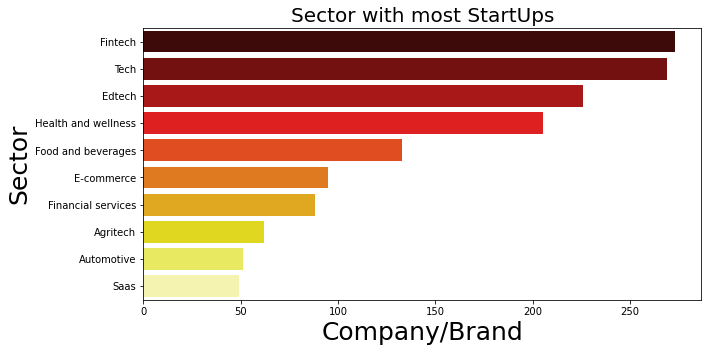

In [217]:
# Plotting the results

plt.figure(figsize = (10,5))
plt.title('Sector with most StartUps',fontsize = 20)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 10, rotation = 'horizontal')
plt.ylabel('Sector',fontsize = 25)
plt.xlabel('Company/Brand', fontsize = 25)
sns.barplot(x = 'Company/Brand', y = 'Sector', data  = SectorStartup, palette = 'hot')
plt.savefig('SectorStartUp.png', dpi = 300)
plt.show()

#  Q2. What industries or Sectors had the most funding?

In [135]:
# Grouping Sectors based on the Amount of funding recieved.

sectorFunding = pd.DataFrame(funding.groupby('Sector')['Amount'].sum().sort_values(ascending = False).reset_index().head(10))
sectorFunding['Amount'] = sectorFunding['Amount'].apply(lambda x: math.ceil(x))
sectorFunding

,Sector,Amount
0,Fintech,154937347500
1,Tech,76927072860
2,Edtech,6536379230
3,Food and beverages,4320308000
4,E-commerce,3128798000
5,Health and wellness,2938254745
6,Automotive,2363288722
7,Multinational conglomerate company,2200000000
8,Financial services,2101002500
9,Hospitality,1741561000


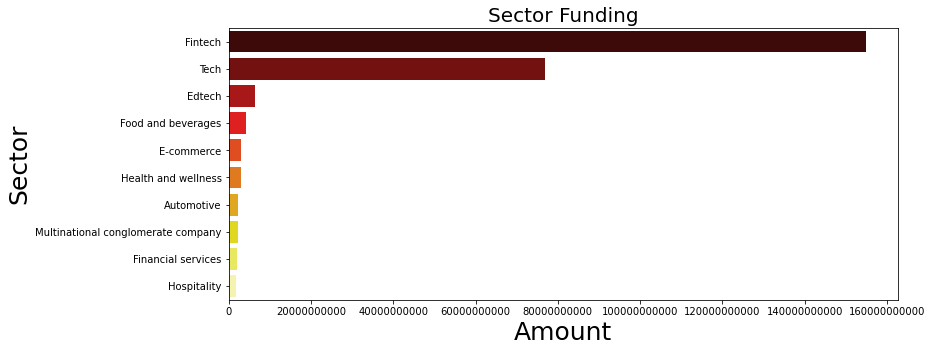

In [157]:
# Visualizing the results

plt.figure(figsize = (12,5))
plt.title('Sector Funding',fontsize = 20)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 10, rotation = 'horizontal')
plt.ylabel('Sector',fontsize = 25)
plt.xlabel('Amount', fontsize = 25)
sns.barplot(x = 'Amount', y = 'Sector', data  = sectorFunding,palette = 'hot')
plt.savefig('SectorFounding.png', dpi = 300)
plt.show()

# Q3. What is the yearly average of funding received by Indian start-ups?

In [219]:
# Getting the average Amount of funding for each year under review.

YearlyAverage = pd.DataFrame(funding.groupby('Year of funding')['Amount'].mean().reset_index())
YearlyAverage['Amount'] = YearlyAverage['Amount'].apply(lambda x: math.ceil(x))
YearlyAverage


,Year of funding,Amount
0,2018,12992725
1,2019,38297003
2,2020,87349236
3,2021,149171971


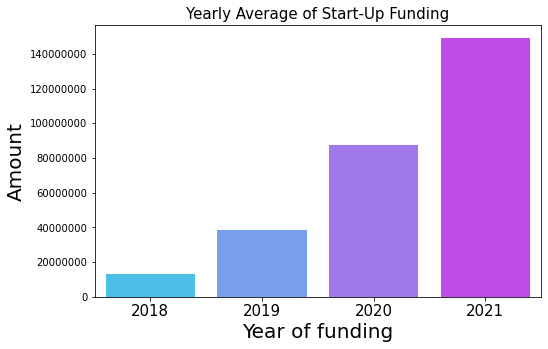

In [156]:
# Visualizing the results

plt.figure(figsize = (8,5))
plt.title('Yearly Average of Start-Up Funding',fontsize = 15)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 15, rotation = 'horizontal')
plt.ylabel('Average Funds',fontsize = 20)
plt.xlabel('Year of funding', fontsize = 20)
sns.barplot(x = 'Year of funding', y = 'Amount', data  = YearlyAverage,palette = 'cool')
plt.savefig('YearlyAverage.png', dpi = 300)
plt.show()

# Q4. What is the number of Start-Ups in each year ( 2018 to 2021)?

In [139]:
# Obtaining the number of start-ups in each year.

StartUps_per_year = funding.groupby('Year of funding')['Company/Brand'].count().sort_values(ascending = False)
StartUps_per_year

Year of funding
2021    1209
2020    1055
2018     526
2019      89
Name: Company/Brand, dtype: int64

# Q5. Which year of start-Ups received the most funding?

In [141]:
# Grouping by the year the start-ups were founded and Amount of funding received 
FoundedFunding = pd.DataFrame(funding.groupby('Founded')['Amount'].sum().sort_values(ascending = False).reset_index().head(10))
FoundedFunding['Amount'] = FoundedFunding['Amount'].apply(lambda x: math.ceil(x))
FoundedFunding

,Founded,Amount
0,2018.0,154845248730
1,2006.0,70857232700
2,2015.0,8662980600
3,2011.0,6172610000
4,2012.0,4602842446
5,2014.0,4492478900
6,2016.0,4129870900
7,2010.0,3915123000
8,2017.0,2959715300
9,2013.0,2550241500


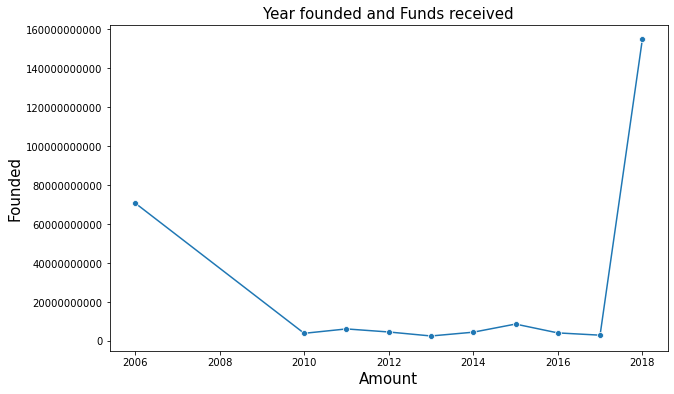

In [169]:
# Visualizing the results.

plt.figure(figsize = (10,6))
plt.title('Year founded and Funds received',fontsize = 15)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 10, rotation = 'horizontal')
plt.ylabel('Founded',fontsize = 15)
plt.xlabel('Amount', fontsize = 15)
sns.lineplot(x = 'Founded', y = 'Amount', data  = FoundedFunding,marker = 'o')
plt.savefig('FoundedFunding.png', dpi = 300)
plt.show()

#  Q6. Does location of business influence investor decision?

In [142]:
# Grouping the location of start-ups and the Amount of funding that went to those locations.
LocationFunded = pd.DataFrame(funding.groupby('HeadQuarter')['Amount'].sum().sort_values(ascending = False).reset_index().head(10))
LocationFunded['Amount'] = LocationFunded['Amount'].apply(lambda x: math.ceil(x))
LocationFunded

,HeadQuarter,Amount
0,Mumbai,232174525100
1,Bangalore,26646179710
2,Gurugram,7604508580
3,Delhi,4602990640
4,California,3081300000
5,Pune,1442538705
6,Chennai,1153775826
7,Haryana,768825000
8,Noida,673974000
9,Jaipur,538089000


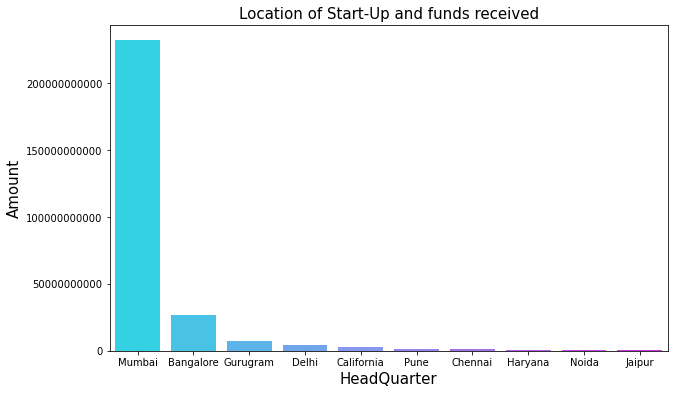

In [216]:
# Visualizing the results
plt.figure(figsize = (10,6))
plt.title('Location of Start-Up and funds received',fontsize = 15)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 10, rotation = 'horizontal')
plt.ylabel('HeadQuarter',fontsize = 15)
plt.xlabel('Amount', fontsize = 15)
sns.barplot(x = 'HeadQuarter', y = 'Amount', data  = LocationFunded,palette = 'cool',)
plt.savefig('LocationFunded.png', dpi = 300)
plt.show()

#  Q7. Which investors made the most investment in Indian start-ups? 

In [225]:
# Grouping based on Investors and the Amount invested in start_ups
InvestorFunding = pd.DataFrame(funding.groupby('Investor')['Amount'].sum().sort_values(ascending = False).reset_index().head(10))
InvestorFunding['Amount'] = InvestorFunding['Amount'].apply(lambda x: math.ceil(x))
InvestorFunding

,Investor,Amount
0,Mubadala Investment Company,70000000000
1,Dragoneer Investment Group,3000000000
2,Google,2200000000
3,Tiger Global Management,1915000000
4,Kohlberg Kravis Roberts,800000000
5,Avendus Finance,693000000
6,the CPP Investment Board,540000000
7,VMS Asset Management,400000000
8,CDC Group,390000000
9,Hyundai,311000000


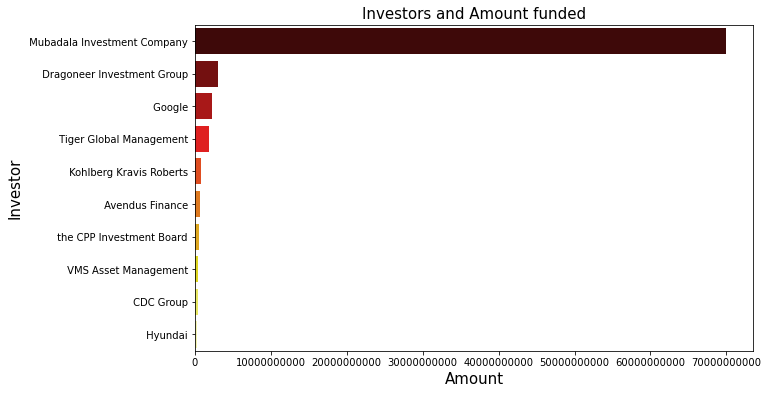

In [214]:
#Visualizing the results

plt.figure(figsize = (10,6))
plt.title('Investors and Amount funded',fontsize = 15)
plt.ticklabel_format(style = 'plain')
plt.xticks(fontsize = 10, rotation = 'horizontal')
plt.ylabel('Investor',fontsize = 15)
plt.xlabel('Amount', fontsize = 15)
sns.barplot(x = 'Amount', y = 'Investor', data  = InvestorFunding,palette = 'hot')
plt.savefig('InvestorFunded.png', dpi = 300)
plt.show()

### CONCLUSION

The Start-Up eco system in Indian is very diverse and has lots start-ups springing up in various sectors of the economy.  

The goal of this project was to find if Start-ups in the tech sector are more likely to receive funding than other sectors. From the findings it can be concluded that it is indeed true that the tech (Especially Fintech) sector received more funding than any other sector. 
Whereas this evidently true it could have also been influence by the COVID 19 pandemic which started in late 2019. This could have forced the tech sectors to flourish due to the fact that things were done remotely. 

In conclusion, the Tech sector receives more funding than any other sector, this implies the business start-ups should consider venturing into tech products or services. Start ups should also consider the location of their business. Cities such as Mumbai, Bangalore and Delhi also attract more funding from investors.
